# Método de Box-Muller para generar una V.A. con distribución normal

El método de Box-Muller toma ventaja de una sencilla transormación de variables que permite obtener a partir de dos variables independientes uniformemente distribuidas otras dos variables independientes con distribución normal. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Genero dos variables uniformes y mediante la expresión dada construyo g1 y g2 variables normales

In [2]:
n = 10000
x = np.random.random(n)
y = np.random.random(n) 

g1 = np.sqrt(-2*np.log(1-x))*np.cos(2*np.pi*y)
g2 = np.sqrt(-2*np.log(1-x))*np.sin(2*np.pi*y)

La distribución normal estándar:

In [3]:
z = np.linspace(-4,4,200)
gT = np.exp(-z**2/2)/np.sqrt((2*np.pi))

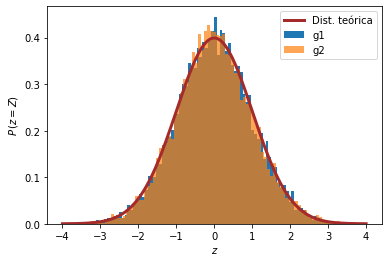

In [4]:
plt.hist(g1,density=True,bins=int(np.sqrt(n)), label='g1')
plt.hist(g2,density=True,bins=int(np.sqrt(n)),alpha=0.7,label='g2')
plt.plot(z,gT,label='Dist. teórica',color='brown',lw=3)
plt.xlabel('$z$')
plt.ylabel('$P\,(z=Z)$')
plt.legend()
plt.show()


Ahora genero variables aleatorias y me quedo con aquellas que caigan dentro del círculo unidad. 

In [5]:
xc = np.random.uniform(-1,1,int(n*4/np.pi))
yc = np.random.uniform(-1,1,int(n*4/np.pi))
r2 = xc**2+yc**2
ind = np.where(r2<=1)[0]
xc = xc[ind]
yc = yc[ind]
r2 = r2[ind]

gc1 = xc*np.sqrt(-2*np.log(r2)/r2)
gc2 = yc*np.sqrt(-2*np.log(r2)/r2) # Por qué es más eficaz así?

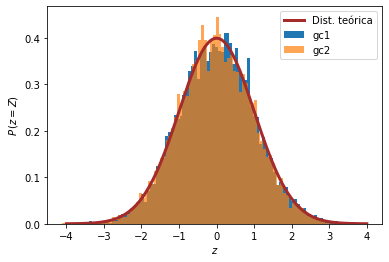

In [6]:
plt.hist(gc1,density=True,bins=int(np.sqrt(n)), label='gc1')
plt.hist(gc2,density=True,bins=int(np.sqrt(n)),alpha=0.7,label='gc2')
plt.plot(z,gT,label='Dist. teórica',color='brown',lw=3)
plt.xlabel('$z$')
plt.ylabel('$P\,(z=Z)$')
plt.legend()
plt.show()